In [2]:
# 載入相關套件
import numpy as np       #數學處理
import pandas as pd       #資料處理
import matplotlib.pyplot as plt #繪圖
import seaborn as sns

In [3]:
data=pd.read_csv('The California housing dataset.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [4]:
# 缺失值、異常值處理
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
d = pd.DataFrame(data) #特徵只有一個欄位:x
# 查看資料分布狀況
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


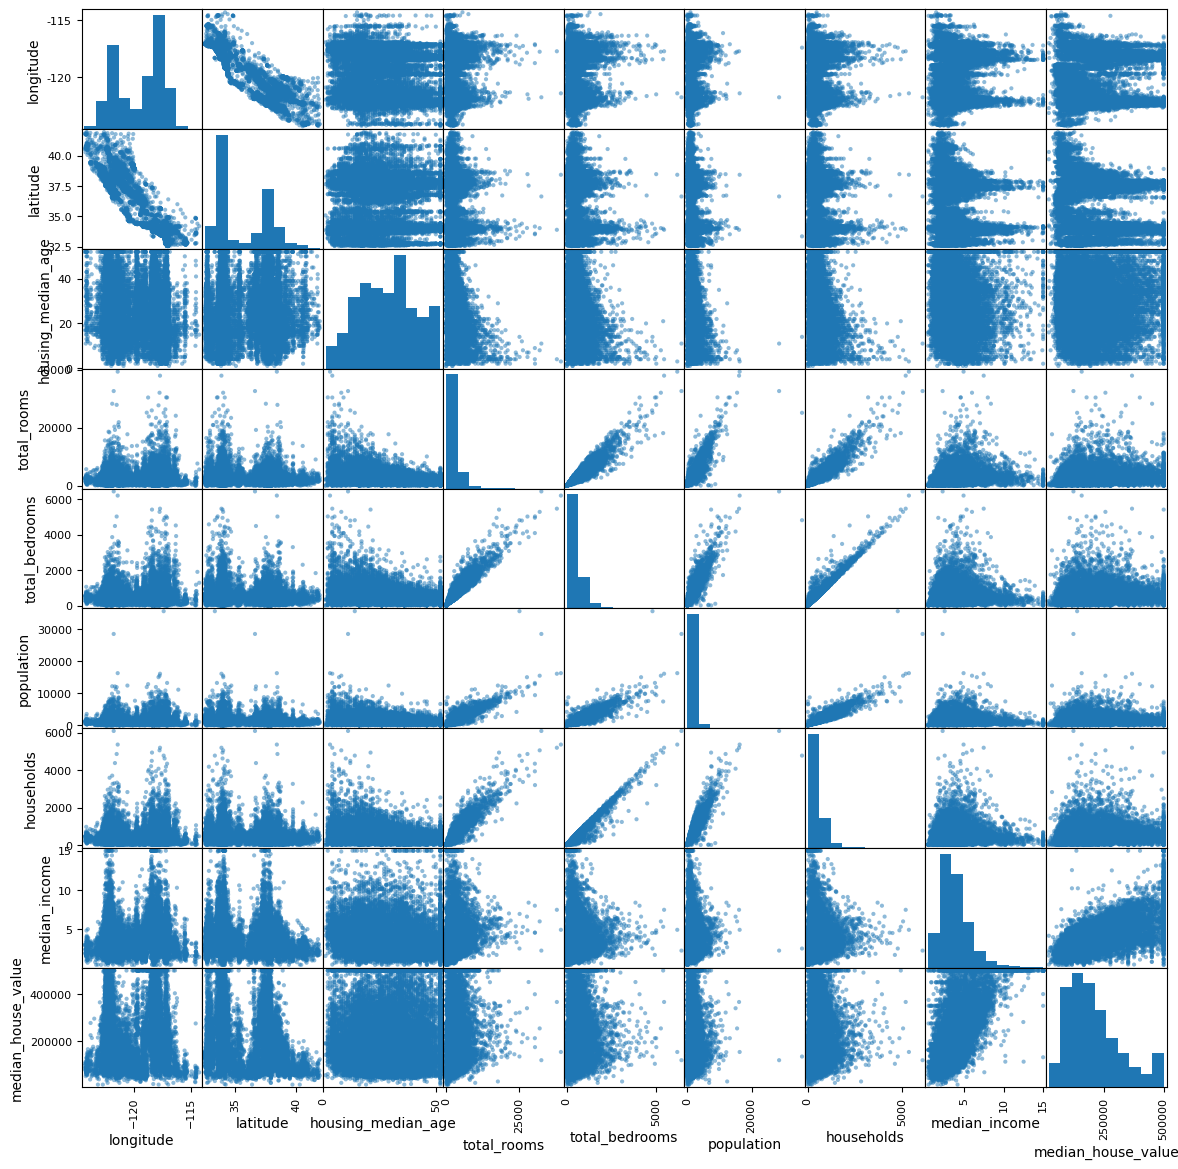

In [7]:
# 多欄位彼此關係
from pandas.plotting import scatter_matrix
_=scatter_matrix(data,figsize=(14,14))

In [7]:
# 求出四分位距(IQR)=Q3-Q1與上邊界(天花板)和下邊界(地板)
Q1=d['PRICE'].quantile(0.25)
Q3=d['PRICE'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 24.8 Q1= 16.45 IQR= 8.350000000000001 Upper= 37.325 Lower= 3.924999999999997


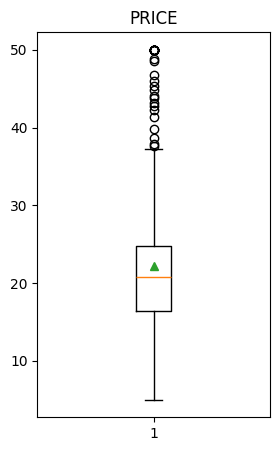

In [8]:
#合鬚圖
plt.figure(figsize=(3,5))
plt.boxplot(d['PRICE'],showmeans=True)
plt.title('PRICE')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1300\2204470728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PRICE'])


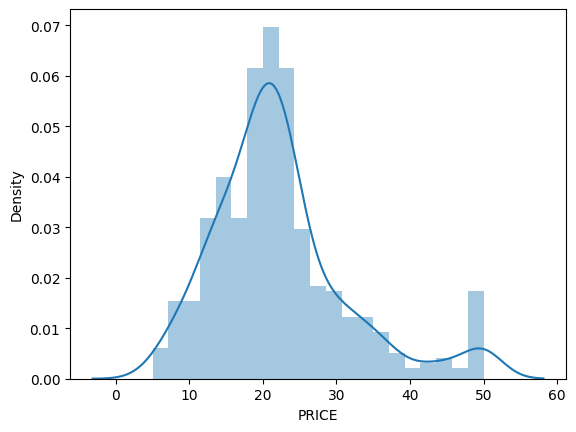

In [9]:
sns.distplot(d['PRICE'])
plt.show()

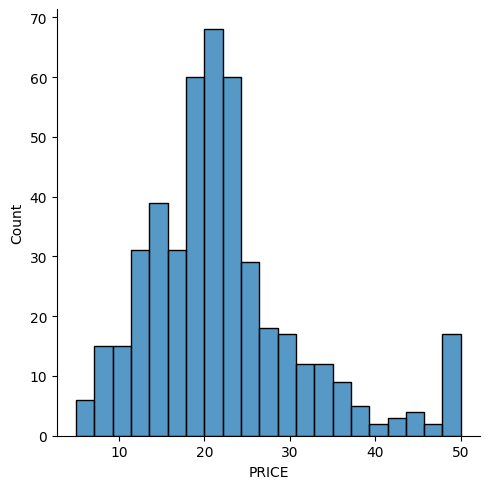

In [10]:
#常態分佈圖
sns.displot(d['PRICE'])
plt.show()

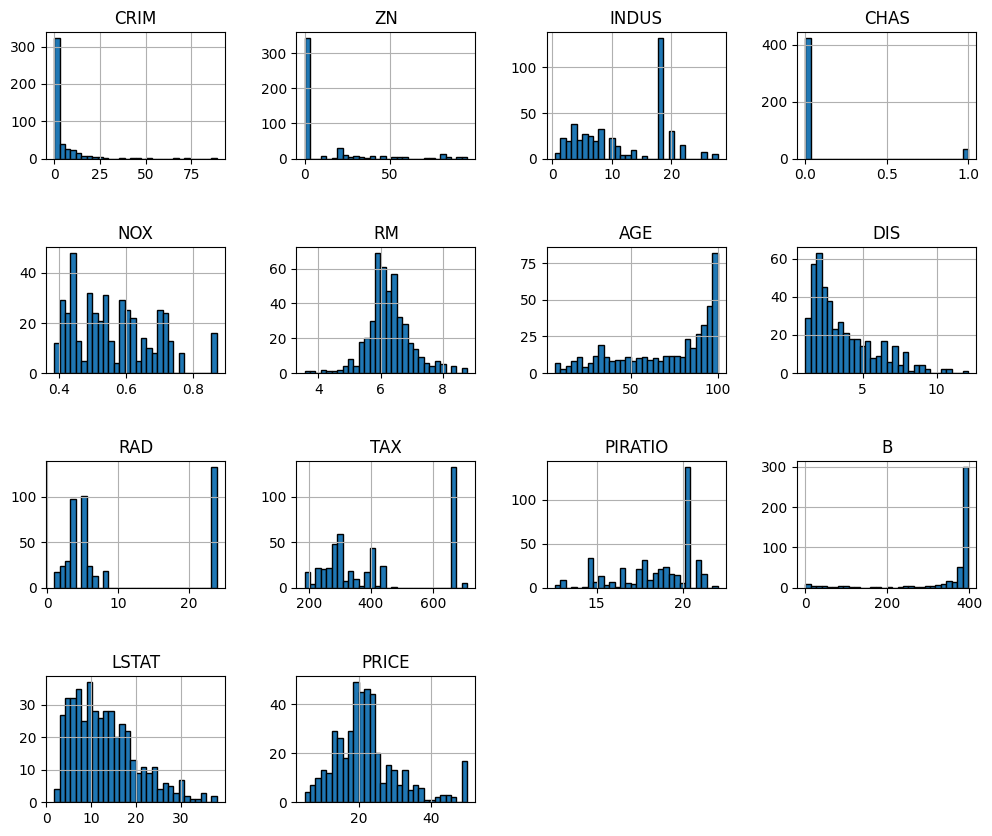

In [11]:
# 直方圖特徵分佈
d.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [12]:
#皮爾森(Pearson) 相關係數
#取前三名特徵值
featuresCorr = d.corr()
featuresCorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.205632,0.393648,-0.063570,0.411682,-0.220061,0.352572,-0.374492,0.618479,0.576025,0.295547,-0.376427,0.459179,-0.396399
ZN,-0.205632,1.000000,-0.547377,-0.040380,-0.524176,0.323751,-0.593847,0.689340,-0.324597,-0.326639,-0.384478,0.177723,-0.419877,0.371222
INDUS,0.393648,-0.547377,1.000000,0.057280,0.763555,-0.385453,0.658030,-0.706997,0.584828,0.710938,0.379742,-0.346107,0.603247,-0.480399
CHAS,-0.063570,-0.040380,0.057280,1.000000,0.090169,0.106596,0.080590,-0.089910,-0.017006,-0.044141,-0.136945,0.057294,-0.065662,0.195238
NOX,0.411682,-0.524176,0.763555,0.090169,1.000000,-0.306766,0.731362,-0.765282,0.605601,0.666606,0.185077,-0.373051,0.587855,-0.437933
RM,-0.220061,0.323751,-0.385453,0.106596,-0.306766,1.000000,-0.242714,0.214605,-0.215386,-0.287723,-0.344080,0.123747,-0.608875,0.669990
AGE,0.352572,-0.593847,0.658030,0.080590,0.731362,-0.242714,1.000000,-0.767679,0.456682,0.512556,0.264659,-0.271744,0.588139,-0.387366
DIS,-0.374492,0.689340,-0.706997,-0.089910,-0.765282,0.214605,-0.767679,1.000000,-0.488798,-0.528311,-0.236137,0.285021,-0.502574,0.259980
RAD,0.618479,-0.324597,0.584828,-0.017006,0.605601,-0.215386,0.456682,-0.488798,1.000000,0.912462,0.486445,-0.435313,0.494911,-0.394492
TAX,0.576025,-0.326639,0.710938,-0.044141,0.666606,-0.287723,0.512556,-0.528311,0.912462,1.000000,0.483593,-0.432537,0.547513,-0.472499


<Axes: >

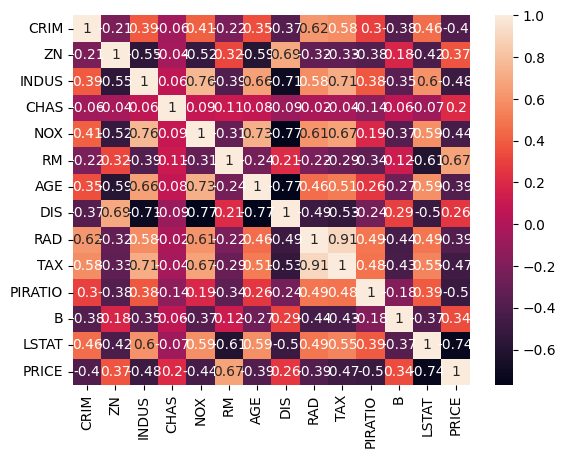

In [13]:
# 熱力圖
correlation_matrix = data.corr().round(2)
# .round(2) 將計算出的相關係數四捨五入到小數點後兩位
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)

In [14]:
target = featuresCorr.iloc[:, -1]
target

CRIM      -0.396399
ZN         0.371222
INDUS     -0.480399
CHAS       0.195238
NOX       -0.437933
RM         0.669990
AGE       -0.387366
DIS        0.259980
RAD       -0.394492
TAX       -0.472499
PIRATIO   -0.502491
B          0.338793
LSTAT     -0.742985
PRICE      1.000000
Name: PRICE, dtype: float64

In [15]:
targetCorr = featuresCorr['PRICE']
targetCorr = targetCorr.drop('PRICE')
selectedFeatures = targetCorr[abs(targetCorr) > 0.51]
print("選擇特徵數： {} \n選擇特徵:\n{}".
      format(len(selectedFeatures), selectedFeatures))

選擇特徵數： 2 
選擇特徵:
RM       0.669990
LSTAT   -0.742985
Name: PRICE, dtype: float64


In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('train_dataset.csv')

# 假設 'selectedFeatures' 包含你要選取的欄位名稱：
selectedFeatures = ['LSTAT', 'RM']  # 更換成你實際的欄位名稱

x = df[selectedFeatures]
y = df['PRICE']

# 如果需要填充空值，可以執行以下操作（取消註解並根據需要調整）：
# x['age'].fillna(x['age'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 使用 DictVectorizer 將資料轉換為決策樹可以處理的格式
dict = DictVectorizer(sparse=False)
x_train = x_train.to_dict(orient='records')
x_train = dict.fit_transform(x_train)
x_test = x_test.to_dict(orient='records')
x_test = dict.transform(x_test)

print('訓練資料：')
print(x_train)
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())


訓練資料：
[[ 9.55   6.069]
 [14.44   5.966]
 [14.1    6.122]
 [13.59   5.926]
 [16.65   5.628]
 [11.41   5.841]
 [23.69   6.38 ]
 [20.08   5.155]
 [18.71   6.728]
 [ 3.13   8.04 ]
 [30.62   4.88 ]
 [ 7.9    6.266]
 [ 6.56   6.718]
 [11.98   6.674]
 [21.32   6.003]
 [13.11   6.229]
 [ 5.39   7.185]
 [ 4.98   6.575]
 [14.52   6.202]
 [10.45   6.254]
 [ 7.44   6.211]
 [ 3.32   8.375]
 [ 8.23   6.453]
 [14.98   6.114]
 [23.34   4.138]
 [ 7.37   6.606]
 [ 9.16   6.108]
 [ 6.29   6.315]
 [ 9.22   5.927]
 [14.15   5.786]
 [12.6    6.458]
 [11.28   5.727]
 [ 7.51   6.167]
 [15.17   6.208]
 [17.28   6.047]
 [11.74   5.708]
 [12.64   4.973]
 [12.26   6.326]
 [12.03   5.88 ]
 [15.37   5.872]
 [17.11   5.713]
 [18.14   5.427]
 [11.48   6.127]
 [14.76   5.713]
 [ 9.64   5.859]
 [ 2.97   7.875]
 [ 9.54   6.631]
 [12.27   6.474]
 [ 9.93   6.879]
 [23.27   6.629]
 [ 7.85   7.088]
 [ 3.92   7.686]
 [19.37   6.405]
 [12.4    6.095]
 [ 6.47   7.42 ]
 [ 6.36   7.163]
 [24.16   6.174]
 [ 4.21   8.069]
 [11.25 

In [17]:
# 進行資料測試,並計算準確率:
dec = DecisionTreeRegressor()
dec.fit(x_train, y_train)
score = dec.score(x_test, y_test)
print(score)

0.4760204458964057


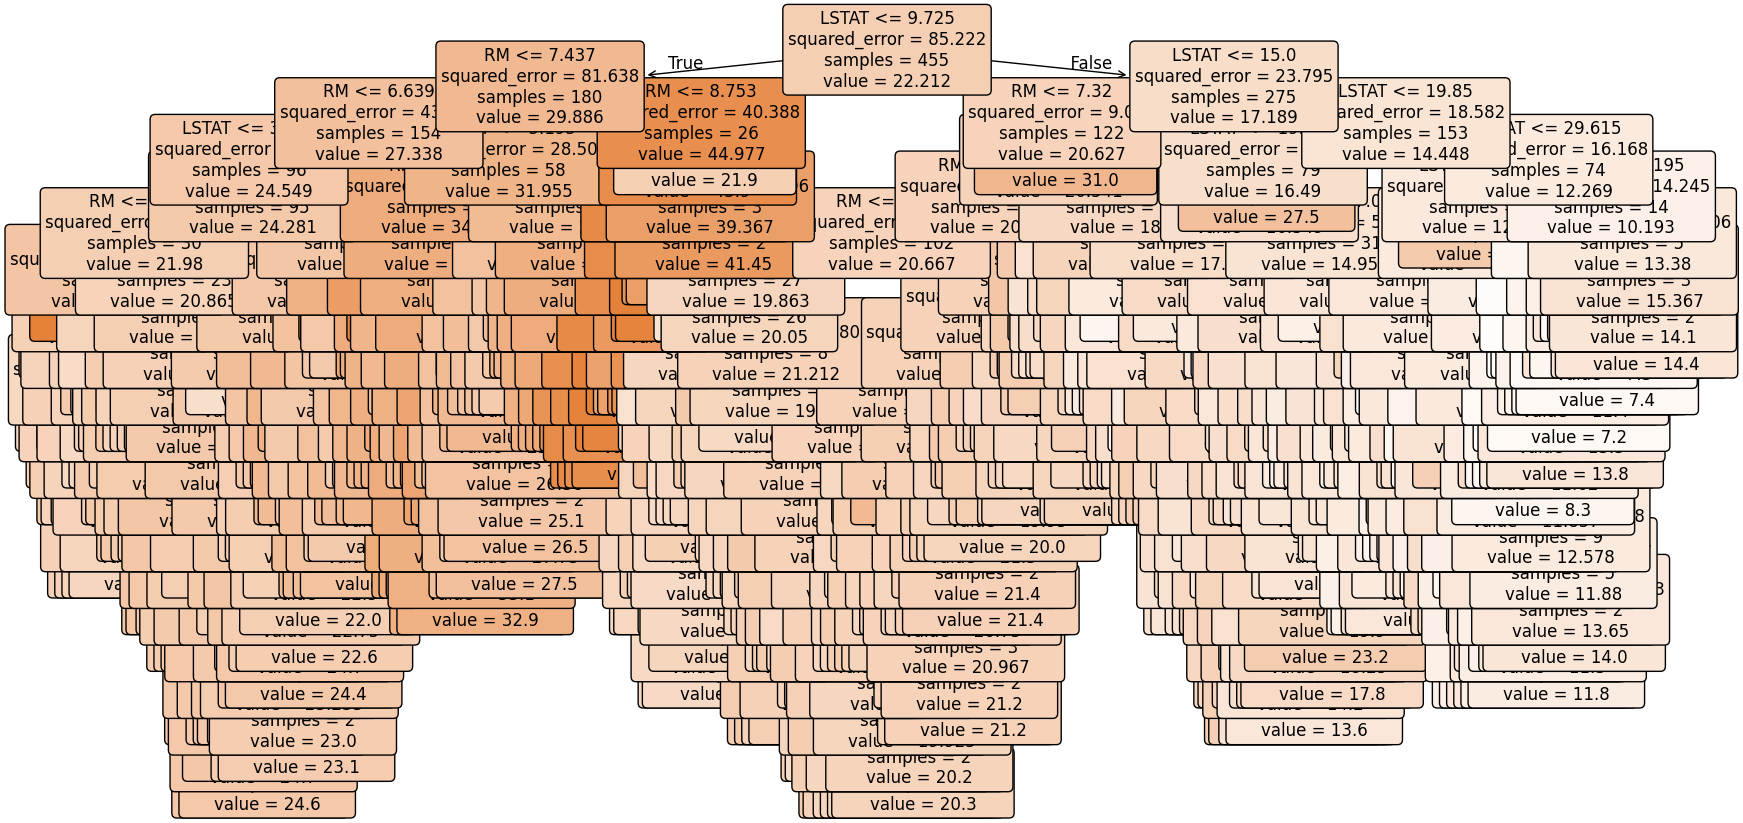

In [18]:
from sklearn import tree
selectedFeatures = ['LSTAT', 'RM']
X = df[selectedFeatures]
y = df["PRICE"]

# 使用 DecisionTreeRegressor 進行回歸分析
regressor = tree.DecisionTreeRegressor()
regressor = regressor.fit(X, y)

# 可視化決策樹
plt.figure(figsize=(20,10))  # 設置圖形大小
tree.plot_tree(regressor, feature_names=selectedFeatures, filled=True, rounded=True, fontsize=12)
plt.show()

In [24]:
import graphviz
from sklearn import tree

# 使用 graphviz 可視化決策樹
dot_data = tree.export_graphviz(
    regressor,
    out_file=None,
    feature_names=selectedFeatures,
    filled=True,
    rounded=True,
    leaves_parallel=True
)

# 創建 graphviz 來源
graph = graphviz.Source(dot_data)
# 渲染決策樹並保存到文件
graph.render('決策樹視覺化')

# 如果想直接顯示決策樹圖形，可以使用以下命令
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

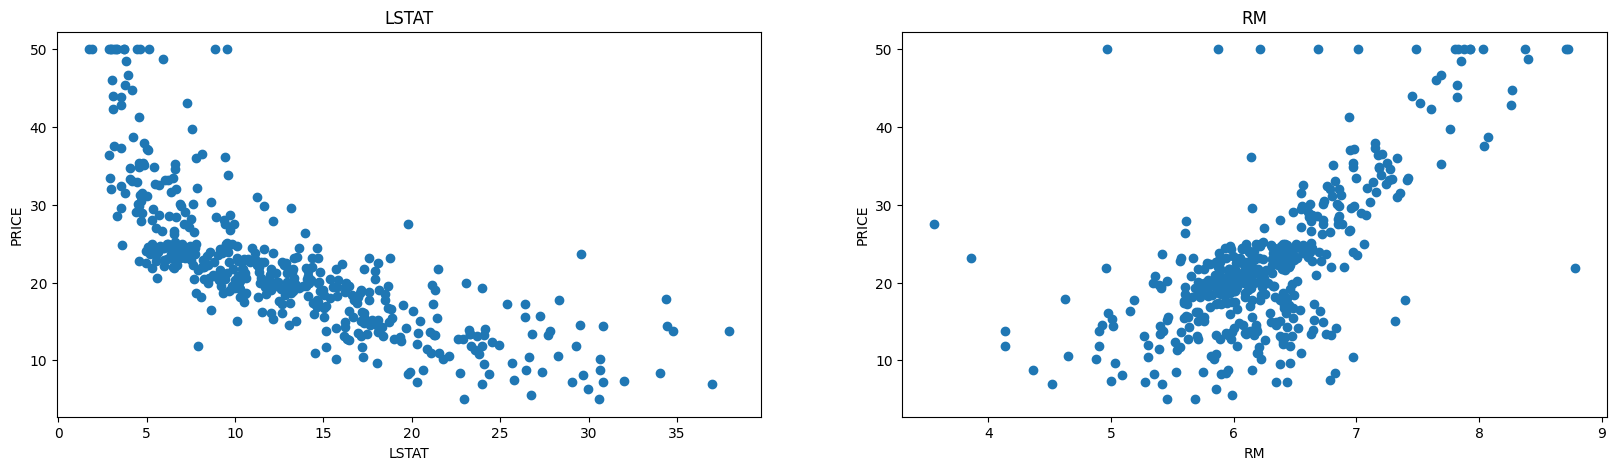

In [ ]:
# LSTAT和RM與房價的線性關係
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = data['PRICE']  # This should work now

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

plt.show()

LSTAT和PRICE是負向關係
RM和PRICE正向關係

In [ ]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['PRICE']

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(364, 2)
(91, 2)
(364,)
(91,)


In [ ]:
# Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 學習/訓練Fitting linear model
reg.fit(X_train,Y_train)
# 預測結果Predicting using the linear model
reg.predict(X_test)
# 真實結果：Y_test
# 測試準確度：
print('R2: ', reg.score(X_test, Y_test))

R2:  0.5882694334342211


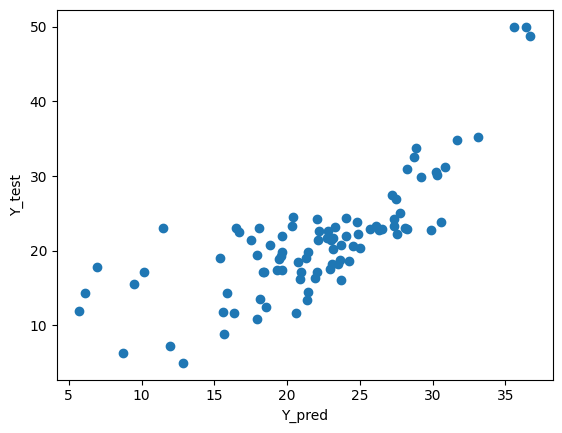

In [ ]:
# plotting the y_test vs y_pred
Y_pred = reg.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

In [ ]:
reg.intercept_

np.float64(3.6396300716228147)

In [ ]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
LSTAT,-0.695375
RM,4.428360


關係式:
PRICE = 3.64 + (-0.695375) *LSTAT + 4.428360 *RM + +error